In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
#Loading data set
from sklearn.datasets import load_breast_cancer
df=load_breast_cancer()
x=pd.DataFrame(df.data,columns=df.feature_names)
y=pd.Series(df.target,name='target')

In [3]:
# splitting the dataset into training and testing dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [4]:
# Feature scaling as we deal with distance (scaling increses the model accuracy to read the data)
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [5]:
x_train_scaled

array([[-1.44075296, -0.43531947, -1.36208497, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.03896885,  0.10207345, -0.03137406, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.54860557,  0.31327591, -0.60350155, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

In [6]:
# Applying grid search cv to find out best parameter 
knn=KNeighborsClassifier()
params={'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
knn_class=GridSearchCV(knn,params,scoring='accuracy',cv=5)
knn_class.fit(x_train_scaled,y_train)
print(knn_class.best_params_)
print(knn_class.best_score_)

{'n_neighbors': 8}
0.9670329670329672


In [7]:
#After tuning paramenter we  find the predicted value
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=8)

In [8]:
y_pred=knn.predict(x_test_scaled)

In [9]:
#Claasification report helps us to find various values
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [12]:
# finidng best parameter using cross validationa and elbow method
cv_score=[]
k_values=list(range(1,21))
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x_train_scaled,y_train,scoring='accuracy',cv=5)
    cv_score.append(np.mean(scores))
cv_score   

[0.9406593406593406,
 0.9472527472527472,
 0.9604395604395604,
 0.9626373626373628,
 0.9604395604395606,
 0.9626373626373628,
 0.9604395604395606,
 0.9670329670329672,
 0.9538461538461538,
 0.9582417582417582,
 0.9516483516483516,
 0.9604395604395604,
 0.9582417582417582,
 0.9582417582417582,
 0.9538461538461538,
 0.956043956043956,
 0.956043956043956,
 0.9582417582417582,
 0.9538461538461538,
 0.956043956043956]

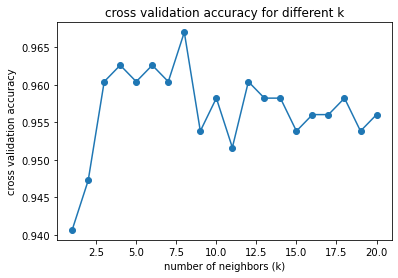

In [14]:
plt.plot(k_values,cv_score,marker='o')
plt.xlabel('number of neighbors (k)')
plt.ylabel('cross validation accuracy')
plt.title('cross validation accuracy for different k')
plt.show()

In [17]:
print(k_values[np.argmax(cv_score)])

8
